Clone https://github.com/rfinn/Virgo, and download the latest VFS data https://drive.google.com/drive/u/2/folders/0B5GLHh0Fb8BpUk9lUmY1c0R0dFk?resourcekey=0-x5xx990yqFdFoEecGAbGlQ

In [1]:
#Import the necessary packages

from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline
import os
import numpy as np
from astropy.io.ascii import masked

import warnings
warnings.filterwarnings('ignore')

mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
#Set the home path

%env HOME=C:/Users/USER/Documents/GitHub
homedir = os.getenv("HOME")
tabledir = homedir+'/Virgo/tables/'
plotdir = homedir+'/Virgo/plots/'

env: HOME=C:/Users/USER/Documents/GitHub


In [3]:
os.listdir(tabledir) #shows what kind of fits tables are in the directory

['FeedingintoHerschel.dat',
 'vf_v2_a100.fits',
 'vf_v2_agc.fits',
 'vf_v2_arcsecH.csv',
 'vf_v2_co.fits',
 'vf_v2_CO_HI.fits',
 'vf_v2_environment.fits',
 'vf_v2_extinction.fits',
 'vf_v2_filament_distances.fits',
 'vf_v2_galfit_g.fits',
 'vf_v2_galfit_r.fits',
 'vf_v2_galfit_W1.fits',
 'vf_v2_galfit_W2.fits',
 'vf_v2_galfit_W3.fits',
 'vf_v2_galfit_W4.fits',
 'vf_v2_galfit_z.fits',
 'vf_v2_halpha.fits',
 'vf_v2_halpha_obs.fits',
 'vf_v2_hyperleda.fits',
 'vf_v2_kourkchi_galaxies.fits',
 'vf_v2_legacy_dr9.fits',
 'vf_v2_legacy_ephot.fits',
 'vf_v2_legacy_viewer.fits',
 'vf_v2_magphys_10-Jul-2023.fits',
 'vf_v2_magphys_legacyExt_11-Jul-2023.fits',
 'vf_v2_magphys_salimExt_11-Jul-2023.fits',
 'vf_v2_main.csv',
 'vf_v2_main.fits',
 'vf_v2_matchTempel_groupinfo.fits',
 'vf_v2_nedquery.fits',
 'vf_v2_nsa_v0.fits',
 'vf_v2_nsa_v1.fits',
 'vf_v2_paper1.fits',
 'vf_v2_r_photometry.fits',
 'vf_v2_steer17.fits',
 'vf_v2_Tempelgroups_infos.fits',
 'vf_v2_unwise.fits',
 'vf_v2_z0mgs.fits']

In [4]:
#runs the code that will help us do data analysis
%run C:\Users\USER\Documents\GitHub\Virgo\programs/readtablesv2.py --tabledir $tabledir 

In [5]:
%run C:\Users\USER\Documents\GitHub\Virgo\programs/readtablesv2.py --help #runs the help command of the code

usage: readtablesv2.py [-h] [--tabledir TABLEDIR] [--tableprefix TABLEPREFIX]

Read in all virgo filament tables

options:
  -h, --help            show this help message and exit
  --tabledir TABLEDIR   directory where tables are stored
  --tableprefix TABLEPREFIX
                        prefix for tables; default is vf_v2


In [6]:
# make a subset of the main table
HAobsedflag = v.main['HAobsflag']
table = v.main[HAobsedflag]
fill = []
# add column for filament

table.add_column(v.main[HAobsedflag])

#newtab.write(tabledir+"HAobssubset.fits",format='fits',overwrite=True)
#newtab.write(tabledir+"HAobssubset.csv",format='csv',overwrite=True)
#newtab.write(tabledir+"HAobssubset.dat",format='ipac',fill_values=fill, overwrite=True)

In [7]:
# check that the table contains what we think it should
table

VFID,RA,DEC,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,Herschelflag,"col25 [VFID, RA, DEC, vr, radius, radius_flag, objname, PGC, NSAIDV1, NSAIDV0, AGC, NEDname, HLflag, NSAV1flag, NSAV0flag, A100flag, VFID_V1, COflag, HAflag, HAobsflag, Z0MGSflag, Steerflag, unwiseflag, prefix, Herschelflag]"
,,,,arcsec,,,,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36,bool,"(bytes8, float64, float64, float64, float32, bool, bytes28, int32, int32, int32, int64, bytes30, bool, bool, bool, bool, bytes8, bool, bool, bool, bool, bool, bool, bytes36, bool)"
VFID0377,243.62550000000002,62.5366944,2876.1,41.506992,True,IC1210,57589,633255,146842,0,IC 1210,True,True,True,False,VFID0377,True,True,True,True,True,True,VFID0377-IC1210,False,"(b'VFID0377', 243.6255, 62.5366944, 2876.1, 41.506992, True, b'IC1210', 57589, 633255, 146842, 0, b'IC 1210', True, True, True, False, b'VFID0377', True, True, True, True, True, True, b'VFID0377-IC1210', False)"
VFID0385,245.21731112326881,62.433934050249185,3015.6396484375,0.290445,True,--,-1000,530252,0,0,MCG +10-23-067,False,True,False,False,VFID0385,False,False,True,False,True,True,VFID0385-MCG+10-23-067,False,"(b'VFID0385', 245.21731112, 62.43393405, 3015.63964844, 0.290445, True, b'', -1000, 530252, 0, 0, b'MCG +10-23-067', False, True, False, False, b'VFID0385', False, False, True, False, True, True, b'VFID0385-MCG+10-23-067', False)"
VFID0422,243.761709,61.7819444,2942.0,9.911086,True,PGC057611,57611,633260,146848,0,ARK 499,True,True,True,False,VFID0422,True,True,True,True,True,True,VFID0422-ARK499,False,"(b'VFID0422', 243.761709, 61.7819444, 2942., 9.911086, True, b'PGC057611', 57611, 633260, 146848, 0, b'ARK 499', True, True, True, False, b'VFID0422', True, True, True, True, True, True, b'VFID0422-ARK499', False)"
VFID0448,257.543478,61.3504145,3086.9,24.78114,True,UGC10745,59725,24379,4179,0,UGC 10745,True,True,True,False,VFID0448,False,True,True,False,True,True,VFID0448-UGC10745,False,"(b'VFID0448', 257.543478, 61.3504145, 3086.9, 24.78114, True, b'UGC10745', 59725, 24379, 4179, 0, b'UGC 10745', True, True, True, False, b'VFID0448', False, True, True, False, True, True, b'VFID0448-UGC10745', False)"
VFID0469,175.4438415,60.9945906,3288.5,7.032686,True,SDSSJ114146.27+605938.2,4291418,0,0,0,SDSS J114145.90+605931.9,True,False,False,False,VFID0469,False,True,True,False,True,True,VFID0469-SDSSJ114145.90+605931.9,False,"(b'VFID0469', 175.4438415, 60.9945906, 3288.5, 7.032686, True, b'SDSSJ114146.27+605938.2', 4291418, 0, 0, 0, b'SDSS J114145.90+605931.9', True, False, False, False, b'VFID0469', False, True, True, False, True, True, b'VFID0469-SDSSJ114145.90+605931.9', False)"
VFID0473,256.8030195,60.9206687,3097.2,15.17474,True,PGC2609009,2609009,25174,4286,0,WISEA J170712.75+605514.5,True,True,True,False,VFID0473,False,True,True,False,True,True,VFID0473-WISEAJ170712.75+605514.5,False,"(b'VFID0473', 256.8030195, 60.9206687, 3097.2, 15.17474, True, b'PGC2609009', 2609009, 25174, 4286, 0, b'WISEA J170712.75+605514.5', True, True, True, False, b'VFID0473', False, True, True, False, True, True, b'VFID0473-WISEAJ170712.75+605514.5', False)"
VFID0474,176.102055,60.8840823,1497.1,14.558655,True,PGC2608407,2608407,573091,124560,0,WISEA J114424.53+605302.6,True,True,True,False,VFID0474,False,True,True,False,True,True,VFID0474-WISEAJ114424.53+605302.6,False,"(b'VFID0474', 176.102055, 60.8840823, 1497.1, 14.558655, True, b'PGC2608407', 2608407, 573091, 124560, 0, b'WISEA J114424.53+605302.6', True, True, True, False, b'VFID0474', False, True, True, False, True, True, b'VFID0474-WISEAJ114424.53+605302.6', False)"
VFID0481,256.9186545,60.7508328,3056.0,40.749405,True,NGC6307,59655,634065,147732,0,NGC 6307,True,True,True,False,VFID0481,False,True,True,True,True,True,VFID0481-NGC6307,

We need to also do a little tweak to make the .dat file recognizable by the search engine. Open the .dat file in a text editor, and edit the RA and DEC to be lower case, then save

Then, we can input the .dat table into the website https://irsa.ipac.caltech.edu/Missions/herschel.html by going :

Catalog Search -> PACS Point Source Catalog: Extended Source List -> Select -> Multi-object search -> Upload table -> HAobssubset.dat -> Set the radius to 40arcsec -> Run Query

Once we have the results, click on the little floppy disk (save icon) 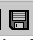 and save it as .csv

Open the table in a spreadsheet editor

upload the .cvs to https://www.legacysurvey.org/viewer using the custom catalog upload at the bottom left

manually go through each point and eliminate duplicate galaxies, marking them off in the spreadsheet editor

Edit the table into the matches using spreadsheet, then export the csv into the tables directory

edit readtablesv2.py to be able to read out the csv table

In [8]:
v.arcsecH

vfid_01,ra_01,dec_01,vr_01,radius_01,radius_flag_01,objname_01,pgc_01,nsaidv1_01,nsaidv0_01,agc_01,nedname_01,hlflag_01,nsav1flag_01,nsav0flag_01,a100flag_01,vfid_v1_01,coflag_01,haflag_01,haobsflag_01,z0mgsflag_01,steerflag_01,unwiseflag_01,prefix_01
str8,float64,float64,float64,float64,str4,str9,int32,int32,int32,int32,str24,str4,str5,str5,str5,str8,str5,str5,str4,str5,str4,str5,str29
VFID0956,177.313767,56.0843617,1173.0,104.0210571,TRUE,NGC3898,36921,627359,140303,0,NGC 3898,TRUE,TRUE,TRUE,FALSE,VFID0957,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,VFID0956-NGC3898
VFID1018,178.9378935,55.3207262,854.0,107.6765823,TRUE,NGC3972,37466,200396,41674,0,NGC 3972,TRUE,TRUE,TRUE,FALSE,VFID1019,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,VFID1018-NGC3972
VFID1035,179.1171885,55.1252607,1112.2,56.50947189,TRUE,NGC3982,37520,200397,41675,0,NGC 3982,TRUE,TRUE,TRUE,FALSE,VFID1036,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,VFID1035-NGC3982
VFID1212,178.4542245,52.3266874,1051.0,183.7051239,TRUE,NGC3953,37306,627439,140405,0,NGC 3953,TRUE,TRUE,TRUE,FALSE,VFID1213,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,VFID1212-NGC3953
VFID1374,181.535652,49.5827722,1115.0,136.8110809,TRUE,NGC4100,38370,665481,161045,0,NGC 4100,TRUE,TRUE,TRUE,FALSE,VFID1376,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,VFID1374-NGC4100
VFID1550,202.469547,47.195151,460.7999878,411.2646179,TRUE,NGC5194,47404,0,0,0,MESSIER 051a,TRUE,FALSE,FALSE,FALSE,VFID1552,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,VFID1550-MESSIER051a
VFID1754,180.790416,44.5312149,704.3,177.060318,TRUE,NGC4051,38068,627684,140667,0,NGC 4051,TRUE,TRUE,TRUE,FALSE,VFID1756,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,VFID1754-NGC4051
VFID1803,183.320361,43.6985004,919.9,128.5645599,TRUE,NGC4183,38988,298117,60664,0,NGC 4183,TRUE,TRUE,TRUE,FALSE,VFID1805,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,VFID1803-NGC4183
VFID1804,182.3740425,43.6852719,875.5,85.5305481,TRUE,NGC4138,38643,665798,161123,0,NGC 4138,TRUE,TRUE,TRUE,FALSE,VFID1806,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,VFID1804-NGC4138


In [9]:
#Convert the csv table into .fits
newH = Table(v.arcsecH)
newH.write(plotdir+"improvedHerschel.fits",format='fits',overwrite=True)

Go on to http://archives.esac.esa.int/hsa/whsa/

Start looking for images of different galaxies

Can compare the images with the ones available on https://facultyweb.siena.edu/~rfinn/virgo/cutouts/index.html

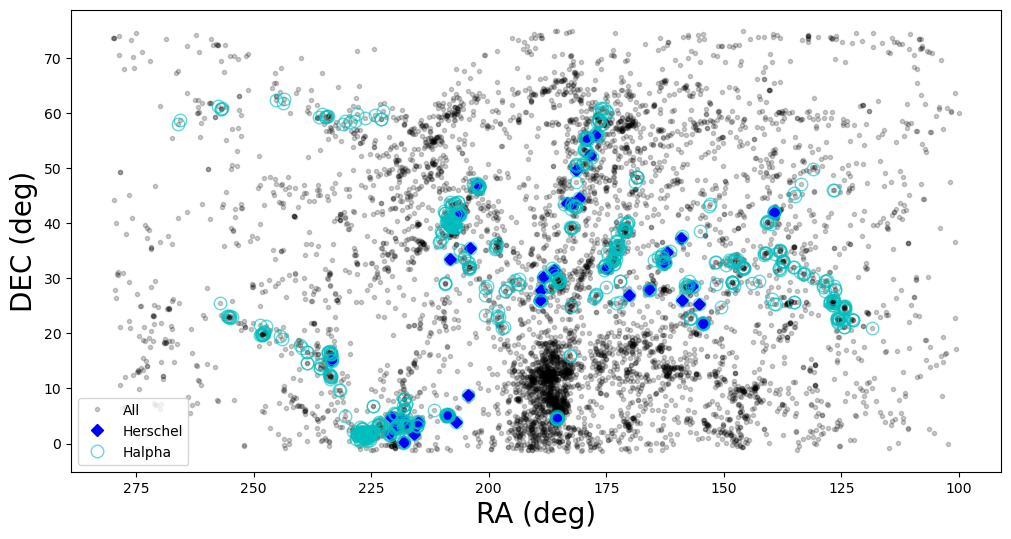

In [10]:
#plotting out Herschel sources
plt.figure(figsize=(12,6))
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2,label='All')
# plot Herschel sources
plt.plot(v.arcsecH['ra_01'],v.arcsecH['dec_01'],'bD',markersize=6,alpha=1,label='Herschel')
# Galaxies observed with Halpha
flag =  v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=9,mfc='None',alpha=.6,label='Halpha')
plt.legend()#label='vr (km/s)')
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.savefig(plotdir+'Herschel-data.png', dpi=150)

Adding a column into the main fits table :

Used https://heasarc.gsfc.nasa.gov/docs/software/ftools/fv/ (fv) for now

Add a boolean column to show whenever a galaxy has Herschel observed data there, then manually go through it changing the values to true

In [11]:
v.main
#Shows how there is a HerschelFlag now

VFID,RA,DEC,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,Herschelflag
,,,,arcsec,,,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36,bool
VFID0000,185.86877249999998,74.9522485,1418.8,23.829847,True,NGC4363,40233,0,0,0,NGC 4363,True,False,False,False,VFID0000,False,False,False,True,True,False,VFID0000-NGC4363,False
VFID0001,182.208,74.9042778,1331.5,49.6731,True,NGC4133,38578,0,0,0,NGC 4133,True,False,False,False,VFID0001,False,False,False,True,True,False,VFID0001-NGC4133,False
VFID0002,145.944663,74.8595778,3049.4,62.3909,True,NGC2977,27845,0,0,0,NGC 2977,True,False,False,False,VFID0002,False,False,False,True,True,False,VFID0002-NGC2977,False
VFID0003,185.5730835,74.8383889,1833.0,26.128908,True,PGC040048,40048,0,0,0,CGCG 352-030,True,False,False,False,VFID0003,False,False,False,True,True,False,VFID0003-CGCG352-030,False
VFID0004,182.82775049999998,74.8082222,1683.0,40.937492,True,UGC07189,38805,0,0,0,UGC 07189,True,False,False,False,VFID0004,False,False,False,True,True,False,VFID0004-UGC07189,False
VFID0005,173.1341835,74.6275401,1920.1,48.654305,True,NGC3752,35608,0,0,0,NGC 3752,True,False,False,False,VFID0005,False,False,False,True,True,True,VFID0005-NGC3752,False
VFID0006,121.912404,74.5846308,2333.0,26.984928,True,UGC04202,22815,0,0,0,UGC 04202,True,False,False,False,VFID0006,False,False,False,True,True,False,VFID0006-UGC04202,False
VFID0007,118.2363,74.576533,2346.0,23.448833,True,PGC022064,22064,0,0,0,KUG 0746+747,True,False,False,False,VFID0007,False,False,False,True,True,False,VFID0007-KUG0746+747,False


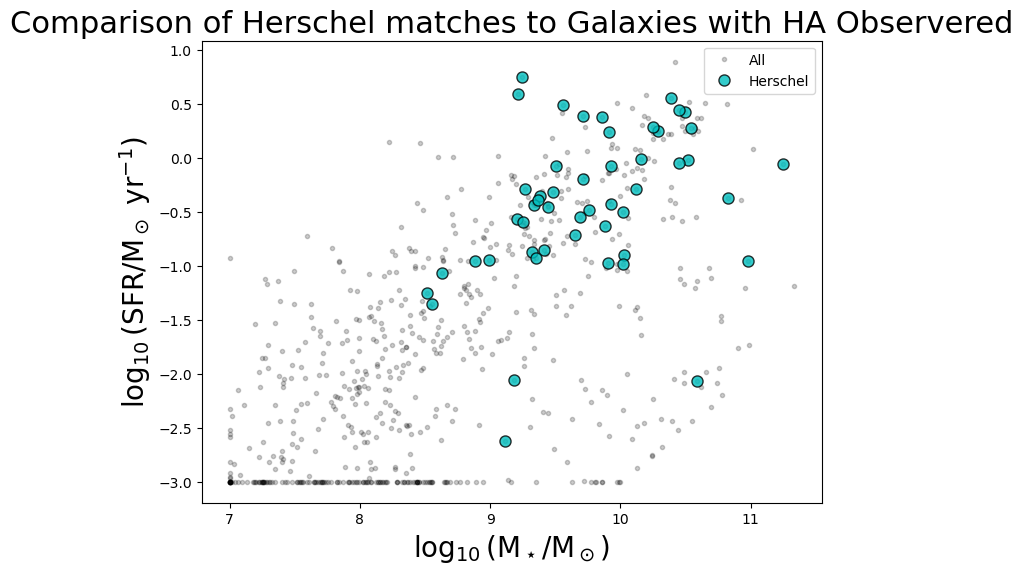

In [18]:
#Can be used to plot other things 

plt.figure(figsize=(8,6))
# make a flag for those with an available stellar mass
flag = v.main['HAobsflag']
zeroflag = v.magphys['logMstar-med'] > 0
# plot SFR vs stellar mass
plt.plot(v.magphys['logMstar-med'][flag & zeroflag],v.magphys['logSFR-med'][flag &zeroflag],'k.',alpha=.2,label='All')

# now let's plot the CO sources as well
flagHerschel = (v.magphys['logMstar-med'] > 0) & v.main['Herschelflag']
plt.plot(v.magphys['logMstar-med'][flagHerschel],v.magphys['logSFR-med'][flagHerschel],'co',markersize=8,mec='k',alpha=.8,label='Herschel')

plt.legend()

plt.xlabel(r'$\rm \log_{10}(M_\star/M_\odot)$',fontsize=20)
plt.ylabel(r'$\rm \log_{10}(SFR/M_\odot~yr^{-1})$',fontsize=20)
plt.title('Comparison of Herschel matches to Galaxies with HA Observered',fontsize=22)
plt.savefig(plotdir+'HAObsFlagvsHerschel.png', dpi=150)

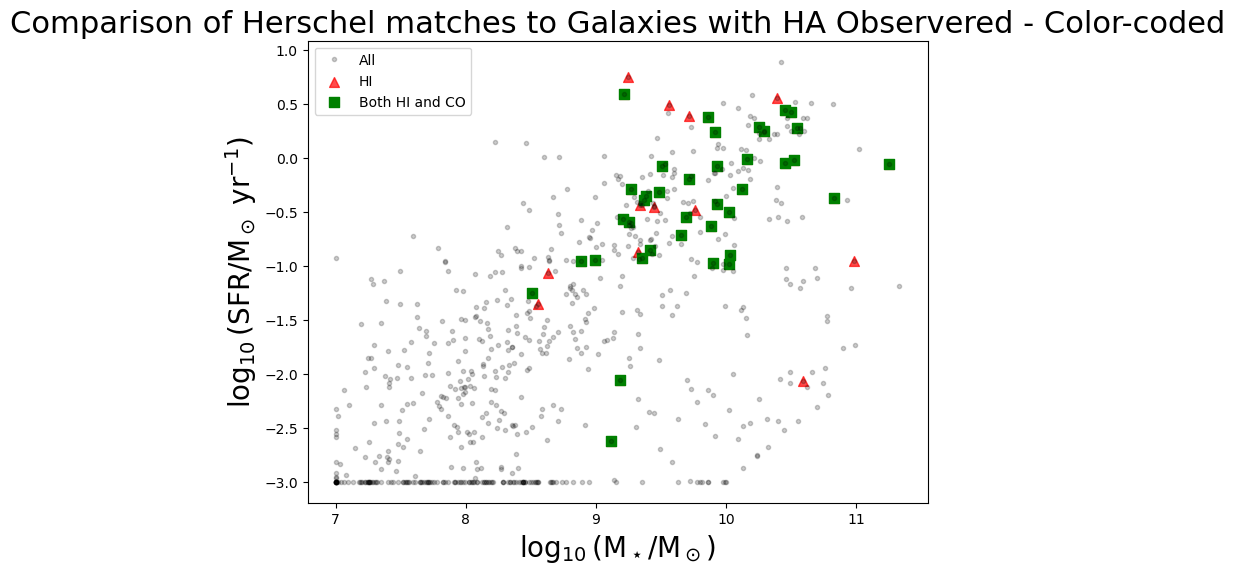

In [19]:
#Can be used to plot other things 

plt.figure(figsize=(8,6))
# make a flag for those with an available stellar mass
flag = v.main['HAobsflag']
zeroflag = v.magphys['logMstar-med'] > 0
HIflag = v.main['HLflag']
COflag = v.main['COflag']


# plot SFR vs stellar mass
plt.plot(v.magphys['logMstar-med'][flag & zeroflag],v.magphys['logSFR-med'][flag &zeroflag],'k.',alpha=0.2,label='All')

# now let's plot the CO sources as well
flagHerschel = (v.magphys['logMstar-med'] > 0) & v.main['Herschelflag']
flagHerschelHI = flagHerschel & HIflag
flagHerschelCO = flagHerschel & COflag
plt.scatter(v.magphys['logMstar-med'][flagHerschelHI & zeroflag], v.magphys['logSFR-med'][flagHerschelHI & zeroflag], c='red', marker='^', s=50, alpha=0.7, label='HI')
plt.scatter(v.magphys['logMstar-med'][flagHerschelHI & flagHerschelCO & zeroflag], v.magphys['logSFR-med'][flagHerschelHI & flagHerschelCO & zeroflag], c='green', marker='s', s=50, alpha=1, label='Both HI and CO')

plt.legend()

plt.xlabel(r'$\rm \log_{10}(M_\star/M_\odot)$',fontsize=20)
plt.ylabel(r'$\rm \log_{10}(SFR/M_\odot~yr^{-1})$',fontsize=20)
plt.title('Comparison of Herschel matches to Galaxies with HA Observered - Color-coded',fontsize=22)
plt.savefig(plotdir+'HAObsFlagvsHerschelColor.png', dpi=150)

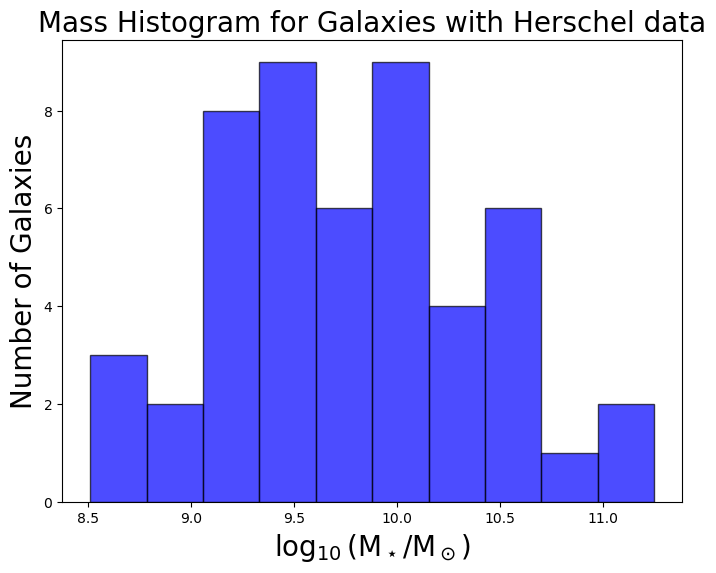

In [26]:
plt.figure(figsize=(8,6))
# make a flag for those with an available stellar mass
flagHerschel = (v.magphys['logMstar-med'] > 0) & v.main['Herschelflag']
# Set the number of bins and the range for the histogram
histogramrange =min(v.magphys['logMstar-med'][flagHerschel]), max(v.magphys['logMstar-med'][flagHerschel])
# Create the histogram
plt.hist(v.magphys['logMstar-med'][flagHerschel], bins=10, range=histogramrange, color='blue', edgecolor='black', alpha=0.7)

# Label the axes
plt.xlabel(r'$\rm \log_{10}(M_\star/M_\odot)$', fontsize=20)
plt.ylabel('Number of Galaxies', fontsize=20)
plt.title('Mass Histogram for Galaxies with Herschel data', fontsize=20)
plt.savefig(plotdir+'HerschelMassHistogram.png', dpi=150)